In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.integrate import odeint
import matplotlib.ticker as mticker

%matplotlib inline

In [4]:
# Parameter definition (dissociation rate constant and association rate constant)

ka1 = 10**7
ka2 = 0.001
kb1 = 10**7
kb2 = 0.001
kc1 = 10**7
kc2 = 1
#kpol = 1 (equilibrium constant for binding of RNAP to DNA)
#rnapol = 5 (concentration RNAP)
#dmrna = 1 (degradation rate constant of RNA transcript)
#dprot = 0.1 (degradation rate constant of protein)
#k_transcripcion = 5 (concentration of RNA transcripts generated per unit time when RNA polymerase is committed to transcription.)
#k_traduccion = 2 (concentration of protein generated per unit time when ribosomes is committed to translation.)
#ca = 1.1 (cooperative binding term)
#ka = 0.7 (equilibrium constant for association of TF to DNA)
#n = 4 (number of TF binding boxes)


Dt = 0.0001 #Size of time interval

In [5]:
# Initial Conditions

def initialize():
    
    global \
    hsp, tf_gr, dex, tf_gr_hsp, tf_gr_dex, hsp_results, tf_gr_results,\
    dex_results, tf_gr_hsp_results, tf_gr_dex_results,\
    t, timesteps, venus_mrna, phi, venus_prot, venus_mrna_results, phi_results,\
    venus_prot_results
    
    # Initial Conditions for the system
    
    hsp = 1*(10**-6)
    tf_gr = 0.1 *(10**-6)
    dex = 10. *(10**-6)
    tf_gr_hsp = 1. *(10**-6)
    tf_gr_dex = 0. 
    t = 0.
    #venus_mrna = 0.
    #phi = 0.
    #venus_prot = 0.
       
    # Result Arrays
    
    hsp_results = [hsp]
    tf_gr_results = [tf_gr]
    dex_results = [dex]
    tf_gr_hsp_results = [tf_gr_hsp]
    tf_gr_dex_results = [tf_gr_dex]
    #venus_mrna_results = [venus_mrna]
    #phi_results = [phi]
    #venus_prot_results = [venus_prot]
        
    timesteps = [t]

In [6]:
# Observe Function

def observe():
    
    global \
    hsp, tf_gr, dex, tf_gr_hsp, tf_gr_dex, hsp_results, tf_gr_results,\
    dex_results, tf_gr_hsp_results, tf_gr_dex_results,\
    t, timesteps, venus_mrna, phi, venus_prot, venus_mrna_results, phi_results,\
    venus_prot_results
    
    hsp_results.append(hsp)
    tf_gr_results.append(tf_gr)
    dex_results.append(dex)
    tf_gr_hsp_results.append(tf_gr_hsp)
    tf_gr_dex_results.append(tf_gr_dex)
    #venus_mrna_results.append(venus_mrna)
    #phi_results.append(phi)
    #venus_prot_results.append(venus_prot)
    
    timesteps.append(t)

In [7]:
# Update Function

def update():
    
    global \
    hsp, tf_gr, dex, tf_gr_hsp, tf_gr_dex, hsp_results, tf_gr_results,\
    dex_results, tf_gr_hsp_results, tf_gr_dex_results,\
    t, timesteps, venus_mrna, phi, venus_prot, venus_mrna_results, phi_results,\
    venus_prot_results
    
    next_hsp = hsp + Dt*(kb2*tf_gr_hsp + ka1*tf_gr_hsp*dex - kb1*tf_gr*hsp - ka2*tf_gr_dex*hsp)
    next_tf_gr = tf_gr + Dt*(kb2*tf_gr_hsp + kc2*tf_gr_dex - kb1*tf_gr*hsp - kc1*tf_gr*dex)
    next_dex = dex + Dt*(kc2*tf_gr_dex + ka2*tf_gr_dex*hsp - kc1*tf_gr*dex - ka1*tf_gr_hsp*dex)
    next_tf_gr_hsp = tf_gr_hsp + Dt*(kb1*tf_gr*hsp + ka2*tf_gr_dex*hsp - kb2*tf_gr_hsp - ka1*tf_gr_hsp*dex)
    next_tf_gr_dex = tf_gr_dex + Dt*(kc1*tf_gr*dex + ka1*tf_gr_hsp*dex - kc2*tf_gr_dex - ka2*tf_gr_dex*hsp)
    #next_phi = phi + Dt*(kpol*rnapol*((tf_gr_dex*ka*ca + 1)**n - 1))/((tf_gr_dex*ka + 1)**n + ((tf_gr_dex*ka*ca + 1)**n)*kpol*rnapol)
    #next_venus_mrna = venus_mrna + Dt*(phi*k_transcripcion - dmrna*venus_mrna)
    #next_venus_prot = venus_prot + Dt*(venus_mrna*k_traduccion - dprot*venus_prot)
    
    
    hsp, tf_gr, dex, tf_gr_hsp, tf_gr_dex = next_hsp, next_tf_gr, next_dex, next_tf_gr_hsp, next_tf_gr_dex
   # phi, venus_mrna, venus_prot = next_phi, next_venus_mrna, next_venus_prot
    t = t + Dt

In [213]:
initialize()

while t < 100.:
    
    update()
    observe()

Text(0.5, 1.0, 'HSP, Dex and TF::GR dynamics over time')

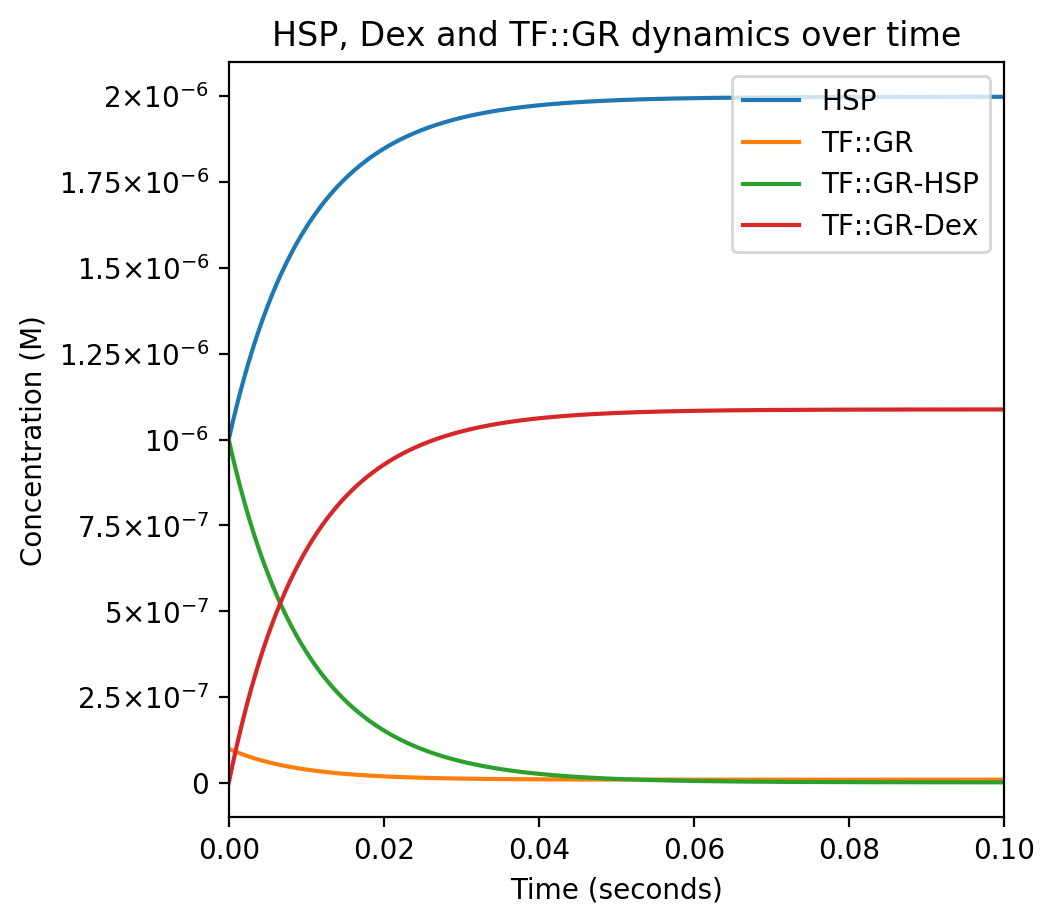

In [214]:
plt.figure(figsize=(5,5), dpi=200)
plt.plot(timesteps, hsp_results, label='HSP')
plt.plot(timesteps, tf_gr_results, label='TF::GR')
plt.plot(timesteps, tf_gr_hsp_results, label='TF::GR-HSP')
#plt.plot(timesteps, dex_results, label='Dex')
plt.plot(timesteps, tf_gr_dex_results, label='TF::GR-Dex')
plt.xlim(0,0.1)
plt.legend(loc='upper right')

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))

plt.xlabel('Time (seconds)')
plt.ylabel('Concentration (M)')
plt.title('HSP, Dex and TF::GR dynamics over time')

In [8]:
plt.figure(figsize=(5,5), dpi=200)
plt.plot(timesteps, venus_mrna_results, label='Venus mRNA')
plt.plot(timesteps, venus_prot_results, label='Venus Protein')
plt.legend()

NameError: name 'timesteps' is not defined

<Figure size 1000x1000 with 0 Axes>